## Analisa Clustering Data Terakhir

Memuat data dari user_page_frequency_matrix_NASA_aggregated.csv...
Melakukan standarisasi data...

Menghitung Elbow Method untuk menentukan jumlah cluster optimal...


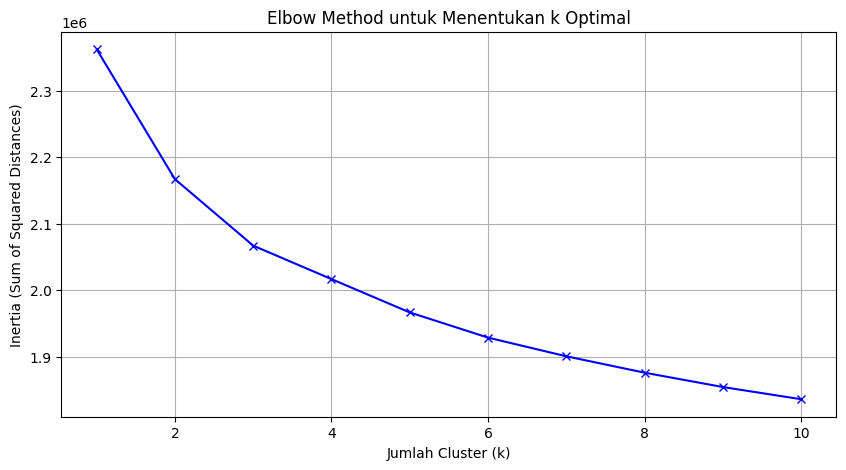


Melakukan K-Means Clustering dengan k=3...
Silhouette Score: 0.7808 (Semakin mendekati 1 semakin baik)
Membuat visualisasi cluster dengan PCA...


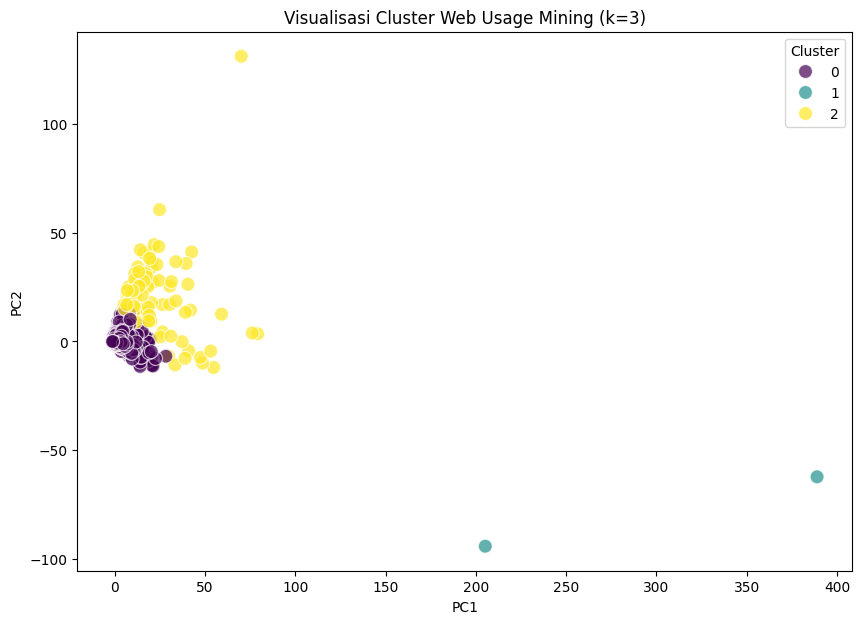


=== Profiling Cluster (Rata-rata Kunjungan per Halaman) ===

Cluster 0:
Jumlah User: 20971
Halaman Paling Sering Diakses:
PAGE_37    0.543131
PAGE_51    0.259692
PAGE_75    0.190644
PAGE_76    0.180154
PAGE_68    0.148252
Name: 0, dtype: float64

Cluster 1:
Jumlah User: 2
Halaman Paling Sering Diakses:
PAGE_37    137.0
PAGE_51     72.0
PAGE_42     63.0
PAGE_75     56.5
PAGE_43     49.5
Name: 1, dtype: float64

Cluster 2:
Jumlah User: 122
Halaman Paling Sering Diakses:
PAGE_51    2.737705
PAGE_30    2.647541
PAGE_33    2.344262
PAGE_37    2.221311
PAGE_20    2.204918
Name: 2, dtype: float64

Hasil clustering lengkap disimpan ke 'hasil_clustering_nasa.csv'


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# ==========================================
# 1. LOAD DATASET
# ==========================================
file_name = "user_page_frequency_matrix_NASA_aggregated.csv"
print(f"Memuat data dari {file_name}...")
df = pd.read_csv(file_name)

# Pisahkan kolom ID (Host/IP) dari fitur (Halaman)
# Kita asumsikan kolom pertama adalah 'HOST_ID' seperti di output notebook Anda
host_ids = df['HOST_ID']
X = df.drop(columns=['HOST_ID'])

# ==========================================
# 2. PREPROCESSING (SCALING)
# ==========================================
# Penting: K-Means sensitif terhadap skala data (variance)
print("Melakukan standarisasi data...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# 3. MENENTUKAN JUMLAH CLUSTER (ELBOW METHOD)
# ==========================================
print("\nMenghitung Elbow Method untuk menentukan jumlah cluster optimal...")
inertia = []
range_values = range(1, 11) # Mencoba k dari 1 sampai 10

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(10, 5))
plt.plot(range_values, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.grid(True)
plt.show()

# ==========================================
# 4. MELAKUKAN CLUSTERING (K-MEANS)
# ==========================================
# Ganti n_clusters sesuai hasil grafik Elbow di atas (misal patahan di k=3)
k_optimal = 3
print(f"\nMelakukan K-Means Clustering dengan k={k_optimal}...")

kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Masukkan hasil cluster ke dataframe asli
df_result = df.copy()
df_result['Cluster'] = clusters

# Evaluasi dengan Silhouette Score
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.4f} (Semakin mendekati 1 semakin baik)")

# ==========================================
# 5. VISUALISASI CLUSTER (PCA)
# ==========================================
# Karena dimensinya banyak (banyak halaman), kita gunakan PCA untuk mereduksi ke 2D
print("Membuat visualisasi cluster dengan PCA...")
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title(f'Visualisasi Cluster Web Usage Mining (k={k_optimal})')
plt.show()

# ==========================================
# 6. ANALISA HASIL CLUSTER (PROFILING)
# ==========================================
print("\n=== Profiling Cluster (Rata-rata Kunjungan per Halaman) ===")
# Melihat rata-rata akses halaman per cluster
cluster_means = df_result.drop(columns=['HOST_ID']).groupby('Cluster').mean()

# Menampilkan 5 Halaman paling sering diakses oleh tiap cluster
for i in range(k_optimal):
    print(f"\nCluster {i}:")
    print(f"Jumlah User: {len(df_result[df_result['Cluster'] == i])}")
    # Ambil 5 halaman teratas
    top_pages = cluster_means.loc[i].sort_values(ascending=False).head(5)
    print("Halaman Paling Sering Diakses:")
    print(top_pages)

# Simpan hasil akhir
df_result.to_csv("hasil_clustering_nasa.csv", index=False)
print("\nHasil clustering lengkap disimpan ke 'hasil_clustering_nasa.csv'")